In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random


In [5]:
filename = "homeprices.csv"
df = pd.read_csv(filename)

df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72500


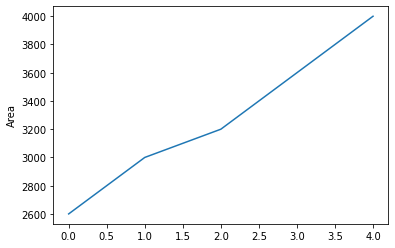

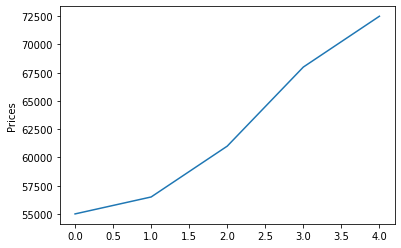

In [6]:
plt.plot(df["area"])
plt.ylabel("Area")
plt.show()

plt.plot(df["price"])
plt.ylabel("Prices")
plt.show()

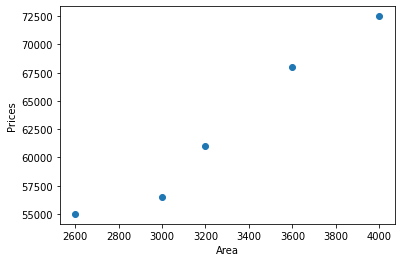

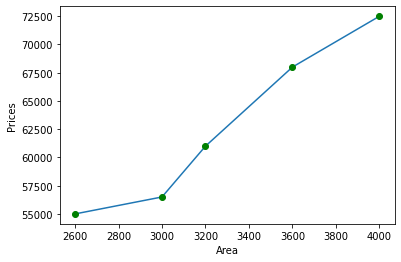

In [7]:
# scatter to mark only dots 
plt.scatter(df.area,df.price)
plt.xlabel("Area")
plt.ylabel("Prices")
plt.show()


plt.plot(df.area,df.price,df.area,df.price,'go')
plt.xlabel("Area")
plt.ylabel("Prices")
plt.show()

In [8]:
theta_0 = random.randint(1,100)*0.01
theta_1 =  random.randint(1,100)*0.01
alpha = 0.3
cost_J = np.array([])
prediction = np.array([])
m = len(df)
area = np.array(df.area).reshape(m,1)
price = np.array(df.price).reshape(m,1)

# Scaling down input to <1 and >-1
std_dev_area = math.sqrt(np.sum(np.square(area-np.mean(area)))/m)
mod_area = (area-np.mean(area))/std_dev_area

for w in range(200) :
    
    # m*1 matrix
    hypothesis = (theta_1*mod_area) + theta_0

    # m*1 matrix
    cost_J = hypothesis - price  

    # Value updation
    theta_0 -= alpha*(np.mean(cost_J))
    theta_1 -= alpha*(np.mean(cost_J*mod_area))

print("Theta_0 :",theta_0,"\tTheta_1 :",theta_1)

prediction_hp = np.array(theta_0 + theta_1*mod_area)
print("Deviation :",(np.mean(np.abs(prediction_hp-price))))
print("Prediction : ",prediction_hp)

Theta_0 : 62599.99999999999 	Theta_1 : 6562.914696616776
Deviation : 1124.657534246576
Prediction :  [[53366.43835616]
 [58797.94520548]
 [61513.69863014]
 [66945.20547945]
 [72376.71232877]]


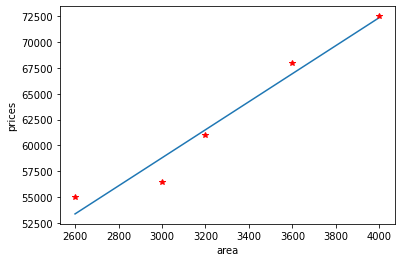

In [9]:
plt.plot(area,prediction_hp,area,price,'r*')
plt.xlabel("area"); plt.ylabel("prices")
plt.show()